In [159]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# pd.set_option('display.max_seq_items', None)
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
# pd.set_option('display.max_columns', None)

In [198]:
a_1 = pd.read_excel('한국아동패널_2018_리버스 및 범주화.xlsx')

null 값 처리

In [193]:
a_1.dropna(axis=1, how='all', inplace = True) #모든 값이 null 인 열 drop
a_1.dropna(axis=0, how='all', inplace = True) # 모든 값이 null인 행 drop

a_1 = a_1.select_dtypes(exclude=['object']) # 답변이 string인 경우 drop

null_df = pd.DataFrame(a_1.isnull().sum() / len(a_1), columns=['null ratio']) # null 비율 확인 후 값 a_1frame화
non_null_list = list(null_df[null_df['null ratio']<= 0.5].index) # null 비율이 절반이 넘는 변수
a_1 = a_1[non_null_list] # null 비율 절반이 넘지 않는 변수만 사p

a_1 = a_1.fillna(a_1.mean())  #평균값으로 대치

크론바흐 알파 테스트

In [81]:

a_1 = a_1.fillna(a_1.mean())    
pp_1 = dict()
for c in a_1.columns:
#     print(c[:8])
    if len(a_1.filter(regex=c[:8]).columns) in [0,1]:
        continue
    else:
        pp_1[c[:8]] = pg.cronbach_alpha(data=a_1.filter(regex=c[:8]))[0]

result_1 = pd.DataFrame(list(pp_1.items()),columns=['variable','value'])
result_1.sort_values(by = ['value'], axis=0, ascending = True)

C:\Users\soso6\Anaconda3\lib\site-packages\pingouin\reliability.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  cronbach = (k / (k - 1)) * (1 - np.trace(C) / C.sum().sum())


,variable,value
16,LIn18int,-inf
2,JCh18ses,-0.36650
41,EMt18dmg,-0.09750
43,DHu18dmg,-0.03449
39,DCh18dmg,-0.02694
38,DHu18int,-0.00252
13,DCh18scl,0.00000
51,DCh18dsc,0.00000
57,DCh18hlt,0.00874
49,DCh18chg,0.05240


각 변수별 문항 값 평균화

In [202]:
a_1=a_1.drop(a_1.filter(regex='JCh18int'), axis=1) 
a_1=a_1.drop(a_1.filter(regex='JCh18hlt'), axis=1)
# 주관형문항 drop
a_1=a_1.drop(a_1.filter(regex='JCh18sav'), axis=1)
a_1=a_1.drop(a_1.filter(regex='JCh18cre'), axis=1)

# 변수 cluster + 애매한문항 drop
a_1['JCh18dsc']=a_1.filter(regex='JCh18dsc').drop('JCh18dsc039', axis=1).mean(axis = 'columns') 
a_1['JCh18eat']=a_1.filter(regex='JCh18eat').mean(axis = 'columns') 
a_1['JCh18pss']=a_1.filter(regex='JCh18pss').mean(axis = 'columns') 
a_1['JCh18com']=a_1.filter(regex='JCh18com').mean(axis = 'columns') 
a_1['JCh18net']=a_1.filter(regex='JCh18net').mean(axis = 'columns') 
a_1['JCh18sfs']=a_1.filter(regex='JCh18sfs').mean(axis = 'columns') 
a_1['JCh18str']=a_1.filter(regex='JCh18str').mean(axis = 'columns') 
a_1['JCh18gri']=a_1.filter(regex='JCh18gri').mean(axis = 'columns')
a_1['JCh18psa']=a_1.filter(regex='JCh18psa').drop(['JCh18psa055'], axis=1).mean(axis = 'columns')
a_1['JCh18scl']=a_1.filter(regex='JCh18scl').mean(axis = 'columns')
a_1['JCh18vio']=a_1.filter(regex='JCh18vio').mean(axis = 'columns')
a_1['JCh18cmt']=a_1.filter(regex='JCh18cmt').mean(axis = 'columns')

In [203]:
# 어머니 데이터 분류

# 무관한문항 drop
a_1=a_1.drop(a_1.filter(regex='EMt18int'), axis=1) 

# 변수 classification + cluster
# 양육태도
a_1['EMt18prb_warmth']=a_1[['EMt18prb001', 'EMt18prb003','EMt18prb005','EMt18prb007','EMt18prb009','EMt18prb011','EMt18prb012','EMt18prb014','EMt18prb021','EMt18prb033','EMt18prb035','EMt18prb046']].mean(axis='columns')
a_1['EMt18prb_control']=a_1[['EMt18prb016','EMt18prb017','EMt18prb018','EMt18prb024','EMt18prb025','EMt18prb026','EMt18prb038','EMt18prb040','EMt18prb042','EMt18prb049','EMt18prb052','EMt18prb053','EMt18prb058','EMt18prb059','EMt18prb060','EMt18prb062']].mean(axis='columns')
a_1['EMt18prb_autonomy']=a_1[['EMt18prb008','EMt18prb022','EMt18prb027','EMt18prb029','EMt18prb031','EMt18prb039','EMt18prb048','EMt18prb051','EMt18prb055']].mean(axis='columns')
a_1['EMt18prb_confusion']=a_1[['EMt18prb004','EMt18prb015','EMt18prb020','EMt18prb030','EMt18prb036','EMt18prb041','EMt18prb045','EMt18prb047','EMt18prb057']].mean(axis='columns')
a_1['EMt18prb_compulsion']=a_1[['EMt18prb002','EMt18prb006','EMt18prb010','EMt18prb013','EMt18prb019','EMt18prb023','EMt18prb028','EMt18prb032','EMt18prb034','EMt18prb037','EMt18prb043','EMt18prb044','EMt18prb050','EMt18prb054','EMt18prb056','EMt18prb061']].mean(axis='columns')

# 집행기능
a_1['ECh18exf_plan']=a_1[['ECh18exf001','ECh18exf002','ECh18exf003','ECh18exf004','ECh18exf005','ECh18exf006','ECh18exf007','ECh18exf008','ECh18exf009','ECh18exf010']].mean(axis='columns')
a_1['ECh18exf_behControl']=a_1[['ECh18exf011','ECh18exf012','ECh18exf013','ECh18exf014','ECh18exf015','ECh18exf016','ECh18exf017','ECh18exf018','ECh18exf019','ECh18exf020','ECh18exf021','ECh18exf022']].mean(axis='columns')
a_1['ECh18exf_emoControl']=a_1[['ECh18exf023','ECh18exf024','ECh18exf025','ECh18exf026','ECh18exf027','ECh18exf028','ECh18exf029','ECh18exf030']].mean(axis='columns')
a_1['ECh18exf_carelessness']=a_1[['ECh18exf031','ECh18exf032','ECh18exf033','ECh18exf034','ECh18exf035','ECh18exf036','ECh18exf037','ECh18exf038','ECh18exf039','ECh18exf040']].mean(axis='columns')

a_1['ECh18mid']=a_1.filter(regex='ECh18mid').mean(axis = 'columns') 
a_1['KCh18eat']=a_1.filter(regex='KCh18eat').mean(axis = 'columns') 

#아동화용언어능력(CPLC)
a_1['ECh18dvl_discourse']=a_1[['ECh18dvl024','ECh18dvl025','ECh18dvl027','ECh18dvl029','ECh18dvl034','ECh18dvl035','ECh18dvl054','ECh18dvl061','ECh18dvl065','ECh18dvl066']].mean(axis='columns')
a_1['ECh18dvl_situation']=a_1[['ECh18dvl026','ECh18dvl031','ECh18dvl036','ECh18dvl041','ECh18dvl042','ECh18dvl044','ECh18dvl048','ECh18dvl052','ECh18dvl053','ECh18dvl055','ECh18dvl059','ECh18dvl060','ECh18dvl062']].mean(axis='columns')
a_1['ECh18dvl_intension']=a_1[['ECh18dvl028','ECh18dvl037','ECh18dvl038','ECh18dvl039','ECh18dvl046','ECh18dvl047','ECh18dvl049','ECh18dvl050','ECh18dvl051','ECh18dvl057','ECh18dvl058','ECh18dvl063','ECh18dvl064','ECh18dvl067']].mean(axis='columns')
a_1['ECh18dvl_nonVerbal']=a_1[['ECh18dvl030','ECh18dvl031','ECh18dvl033','ECh18dvl040','ECh18dvl043','ECh18dvl045','ECh18dvl056']].mean(axis='columns')

a_1['EMt18cfl']=a_1.filter(regex='EMt18cfl').mean(axis = 'columns') 
a_1['EMt18prs']=a_1.filter(regex='EMt18prs').mean(axis = 'columns') 
a_1['EMt18shs']=a_1.filter(regex='EMt18shs').mean(axis = 'columns')
a_1['EMt18hlt']=a_1.filter(regex='EMt18hlt').mean(axis = 'columns')
a_1['EMt18est']=a_1.filter(regex='EMt18est').mean(axis = 'columns')
a_1['EMt18drn']=a_1.filter(regex='EMt18drn').mean(axis = 'columns')
a_1['EMt18smk']=a_1.filter(regex='EMt18smk').mean(axis = 'columns')

In [204]:
# 아버지 데이터 분류

# 무관한문항 drop
a_1=a_1.drop(a_1.filter(regex='FFt18int'), axis=1) 
# 주관형문항 drop
a_1=a_1.drop(a_1.filter(regex='DFt18jcg'), axis=1)
a_1=a_1.drop(a_1.filter(regex='FFt18jce'), axis=1)

# 변수 cluster + 애매한문항 drop
# 양육태도
a_1['FFt18prb_warmth']=a_1[['FFt18prb001', 'FFt18prb003','FFt18prb005','FFt18prb007','FFt18prb009','FFt18prb011','FFt18prb012','FFt18prb014','FFt18prb021','FFt18prb033','FFt18prb035','FFt18prb046']].mean(axis='columns')
a_1['FFt18prb_control']=a_1[['FFt18prb016','FFt18prb017','FFt18prb018','FFt18prb024','FFt18prb025','FFt18prb026','FFt18prb038','FFt18prb040','FFt18prb042','FFt18prb049','FFt18prb052','FFt18prb053','FFt18prb058','FFt18prb059','FFt18prb060','FFt18prb062']].mean(axis='columns')
a_1['FFt18prb_autonomy']=a_1[['FFt18prb008','FFt18prb022','FFt18prb027','FFt18prb029','FFt18prb031','FFt18prb039','FFt18prb048','FFt18prb051','FFt18prb055']].mean(axis='columns')
a_1['FFt18prb_confusion']=a_1[['FFt18prb004','FFt18prb015','FFt18prb020','FFt18prb030','FFt18prb036','FFt18prb041','FFt18prb045','FFt18prb047','FFt18prb057']].mean(axis='columns')
a_1['FFt18prb_compulsion']=a_1[['FFt18prb002','FFt18prb006','FFt18prb010','FFt18prb013','FFt18prb019','FFt18prb023','FFt18prb028','FFt18prb032','FFt18prb034','FFt18prb037','FFt18prb043','FFt18prb044','FFt18prb050','FFt18prb054','FFt18prb056','FFt18prb061']].mean(axis='columns')

a_1['FFt18cfl']=a_1.filter(regex='FFt18cfl').mean(axis = 'columns') 
a_1['FFt18prs']=a_1.filter(regex='FFt18prs').mean(axis = 'columns') 
a_1['FFt18shs']=a_1.filter(regex='FFt18shs').mean(axis = 'columns') 
a_1['FFt18hlt']=a_1.filter(regex='FFt18hlt').mean(axis = 'columns') 
a_1['FFt18est']=a_1.filter(regex='FFt18est').mean(axis = 'columns') 
a_1['FFt18drn']=a_1.filter(regex='FFt18drn').mean(axis = 'columns') 
a_1['FFt18smk']=a_1.filter(regex='FFt18smk').mean(axis = 'columns')
a_1['FFt18wfb']=a_1.filter(regex='FFt18wfb').mean(axis = 'columns')

In [205]:
# 보호자 데이터 분류

# 척도형문항만 추출
# 변수 cluster
a_1['DMt18wfb']=a_1.filter(regex='DMt18wfb').drop(['DMt18wfb026a','DMt18wfb026b','DMt18wfb026c','DMt18wfb026d'], axis=1).mean(axis = 'columns') 
a_1['DMt18scs']=a_1.filter(regex='DMt18scs').drop(['DMt18scs013a','DMt18scs013b','DMt18scs013c','DMt18scs013d','DMt18scs013e','DMt18scs013f','DMt18scs013g','DMt18scs013h','DMt18scs013i'], axis=1).mean(axis = 'columns')
a_1['DCh18hob']=a_1[['DCh18hob007','DCh18hob008']].mean(axis='columns')
a_1['DMt18crs']=a_1[['DMt18crs052','DMt18crs053','DMt18crs054','DMt18crs055']].mean(axis='columns')
a_1['EHu18cmm']=a_1[['EHu18cmm025','EHu18cmm026','EHu18cmm027','EHu18cmm028','EHu18cmm029','EHu18cmm030','EHu18cmm031','EHu18cmm032']].mean(axis='columns')

In [216]:
X = a_1[['JCh18dsc', 'JCh18eat','JCh18pss','JCh18com','JCh18net','JCh18sfs','JCh18str','JCh18gri',
         'JCh18psa','JCh18scl','JCh18vio','JCh18cmt', 
'EMt18prb_warmth','EMt18prb_control','EMt18prb_autonomy','EMt18prb_confusion','EMt18prb_compulsion',
         'ECh18exf_plan','ECh18exf_behControl','ECh18exf_emoControl','ECh18exf_carelessness',
         'ECh18mid','KCh18eat','ECh18dvl_discourse','ECh18dvl_situation','ECh18dvl_intension',
         'ECh18dvl_nonVerbal','EMt18cfl','EMt18prs','EMt18shs','EMt18hlt','EMt18est','EMt18drn',
         'EMt18smk',
'FFt18prb_warmth','FFt18prb_control','FFt18prb_autonomy','FFt18prb_confusion',
         'FFt18prb_compulsion','FFt18cfl','FFt18prs','FFt18shs','FFt18hlt','FFt18est',
         'FFt18drn','FFt18smk','FFt18wfb',
'DMt18wfb','DMt18scs','DCh18hob','DMt18crs','EHu18cmm',
'JCh18ses037', 'JCh18ses038']]

Y = a_1[['JCh18shs012']]

VIF 확인 및 조정

In [208]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# pd.options.display.float_format = '{:.5f}'.format

for i, c in enumerate(X.columns): # VIF 값 높은 순서대로 하나씩 제거 (하나씩 제거하면서 확인해야함)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    if vif.sort_values(by=['VIF Factor'], ascending=False).iloc[0,0] > 10:
        X.drop([vif.sort_values(by=['VIF Factor'], ascending=False).iloc[0,1]], axis=1, inplace=True)
    else:
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["features"] = X.columns
        print(vif.sort_values(by=['VIF Factor'], ascending=False))
        break
    

C:\Users\soso6\Anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


    VIF Factor     features
9      8.27159     FFt18cfl
7      7.95514     EMt18drn
1      7.05326     JCh18net
12     6.94851  JCh18ses037
2      6.24963     JCh18str
3      5.89631     JCh18psa
11     5.60920     DCh18hob
0      5.56511     JCh18com
10     1.83570     FFt18smk
8      1.08789     EMt18smk
6      1.00904     EMt18hlt
5      1.00544     JCh18cmt
4      1.00285     JCh18scl


linear regression 모델 생성

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)

In [212]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(X, has_constant='add')

C:\Users\soso6\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [213]:
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [214]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            JCh18shs012   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1922.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:20:40   Log-Likelihood:                         -984.49
No. Observations:                 999   AIC:                                      1995.
Df Residuals:                     986   BIC:                                      2059.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
JCh18com        0.1587      0.020      7.870      0.000       0.119       0.198
JCh18net        0.1716      0.013     13.562      0.000       0.147       0.196
JCh18str       -0.0265      0.023     -1.156      0.248      -0.071       0.018
JCh18psa        0.1404      0.010     13.545      0.000       0.120       0.161
JCh18scl     1.511e-09   1.72e-08      0.088      0.930   -3.22e-08    3.52e-08
JCh18cmt     4.604e-09   6.55e-09      0.703      0.482   -8.25e-09    1.75e-08
EMt18hlt     4.987e-09   9.27e-09      0.538      0.591   -1.32e-08    2.32e-08
EMt18drn        0.2447      0.026      9.445      0.000       0.194       0.296
EMt18smk       -0.1429      0.092     -1.549      0.122      -0.324       0.038
FFt18cfl        0.2351      0.027      8.753      0.000       0.182       0.288
FFt18smk       -0.0233      0.023     -0.999      0.318      -0.069       0.022
DCh18hob        0.1273      0.013      9.496      0.000       0.101       0.154
JCh18ses037     0.1117      0.029      3.856      0.000       0.055       0.169
==============================================================================
Omnibus:                       19.987   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.719
Skew:                          -0.333   Prob(JB):                     3.17e-05
Kurtosis:                       3.233   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
Y_predict_lr = lm_train.predict(X_test)

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
mae = mean_absolute_error(Y_test, Y_predict_lr)
mse = mean_squared_error(Y_test, Y_predict_lr)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict_lr)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R-square : {0:.3f}'.format(r_square))

MAE : 0.304
MSE : 0.153
RMSE : 0.391
R-square : 0.248


Logistic Regression/ Decision Tree 분석

In [153]:
Y_logit =  pd.cut(Y['JCh18shs012'], bins=[0,3,5], labels=[0,1]) # 값 이진화

In [155]:
X_train_logit, X_test_logit, Y_train_logit, Y_test_logit = train_test_split(X, Y_logit, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y_logit)

In [168]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt.fit(X_train_logit, Y_train_logit)
# 정확도 출력
print(dt.score(X_train_logit, Y_train_logit))
print(dt.score(X_test_logit, Y_test_logit))

0.8268268268268268
0.7855477855477856


In [157]:
from sklearn.metrics import accuracy_score

Y_predict_dt = dt.predict(X_test_logit)
print('Accuracy: %.2f' % accuracy_score(Y_test_logit, Y_predict_dt))

Accuracy: 0.79


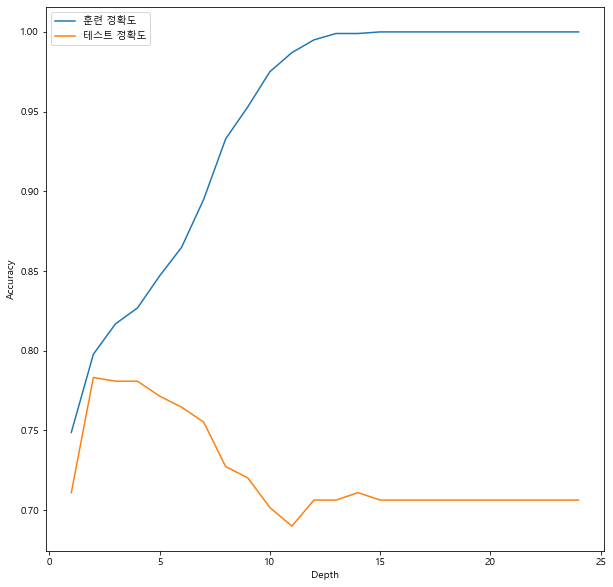

In [160]:
# 가지치기(Puring)
training_accuracy = []
test_accuracy = []

max_depth_settings = range(1, 25)

for k in max_depth_settings:
    # 모델 생성
    dt = DecisionTreeClassifier(max_depth = k, random_state = 1234)
    dt.fit(X_train_logit, Y_train_logit)
    # 정확도 출력
    training_accuracy.append(dt.score(X_train_logit, Y_train_logit))
    test_accuracy.append(dt.score(X_test_logit, Y_test_logit))

# 깊이 증가에 따른 예측정확도 성능 비교
plt.figure(figsize=(10,10))
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

In [161]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score

f1=f1_score(Y_test_logit, Y_predict_dt)
precision=precision_score(Y_test_logit, Y_predict_dt)
recall=recall_score(Y_test_logit, Y_predict_dt)

print("Accuracy:",accuracy_score(Y_test_logit, Y_predict_dt))
print("F1 score: {}" .format(f1))
print("Precision score: {}" .format(precision))
print("Recall score: {}" .format(recall))
print("R2:", r2_score(Y_test_logit, Y_predict_dt))

Accuracy: 0.7855477855477856
F1 score: 0.8553459119496856
Precision score: 0.8168168168168168
Recall score: 0.8976897689768977
R2: -0.03378909319503354


In [169]:
feat_dict = dict()
for name, importance in zip(X_train.columns, dt.feature_importances_):
    feat_dict[name] = importance

In [171]:
feat_dict

{'const': 0.0,
 'JCh18com': 0.06586330048927619,
 'JCh18net': 0.016674919502382844,
 'JCh18str': 0.07976000873010698,
 'JCh18scl': 0.668354197097859,
 'JCh18cmt': 0.036401751364715025,
 'EMt18cfl': 0.03323431682767716,
 'EMt18drn': 0.06467348516003993,
 'EMt18smk': 0.01620163722831291,
 'FFt18cfl': 0.0,
 'FFt18drn': 0.01883638359962992,
 'FFt18smk': 0.0}

In [172]:
logit_m = sm.Logit(Y_train_logit, X_train_logit)
logit_m_train = logit_m.fit(method='powell')

C:\Users\soso6\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\soso6\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\soso6\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\soso6\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


Optimization terminated successfully.
         Current function value: 0.517682
         Iterations: 15
         Function evaluations: 3377


In [173]:
logit_m_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            JCh18shs012   No. Observations:                  999
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           11
Date:                Thu, 16 Dec 2021   Pseudo R-squ.:                  0.1444
Time:                        21:00:00   Log-Likelihood:                -517.16
converged:                       True   LL-Null:                       -604.47
Covariance Type:            nonrobust   LLR p-value:                 1.325e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7583      0.461      3.812      0.000       0.854       2.662
JCh18com       0.3652      0.083      4.409      0.000       0.203       0.528
JCh18net       0.0991      0.051      1.936      0.053      -0.001       0.199
JCh18str      -1.0484      0.099    -10.637      0.000      -1.242      -0.855
JCh18scl   -3.488e-07   1.69e-05     -0.021      0.984   -3.35e-05    3.28e-05
JCh18cmt   -1.318e-07   1.08e-05     -0.012      0.990   -2.14e-05    2.11e-05
EMt18cfl    2.758e-06   2.56e-06      1.079      0.281   -2.25e-06    7.77e-06
EMt18drn       0.1391      0.094      1.481      0.139      -0.045       0.323
EMt18smk      -0.8981      0.337     -2.663      0.008      -1.559      -0.237
FFt18cfl      -0.0433      0.108     -0.403      0.687      -0.254       0.168
FFt18drn       0.0641      0.077      0.830      0.406      -0.087       0.215
FFt18smk      -0.1705      0.085     -2.000      0.045      -0.338      -0.003
==============================================================================
"""